Modelo de machine learning,, mais especificamente, um modelo de regressão. Afim de prever os atrasos nos voos com base em suas características.

In [194]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [195]:
# lendo o arquivo CSV e inserindo os dados para um DataFrame
dados = pd.read_csv('flights.csv')

dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [196]:
#Visualizar as últimas linhas
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [197]:
#Visualizando a quantidade de colunas
dados.shape

(71175, 11)

In [198]:
#discrição dos dados
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [199]:
#Analisar a coluna delay ... para entender o atraso dos voos
dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [200]:
#Verificando informações 
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


Processo de DataViz: Visualizações gráficas dos dados

In [201]:
#Criando um DataFrame para juntar as colunas 'airline' e 'delay'
average_delay = dados.groupby('airline')['delay'].mean().reset_index()

average_delay

,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


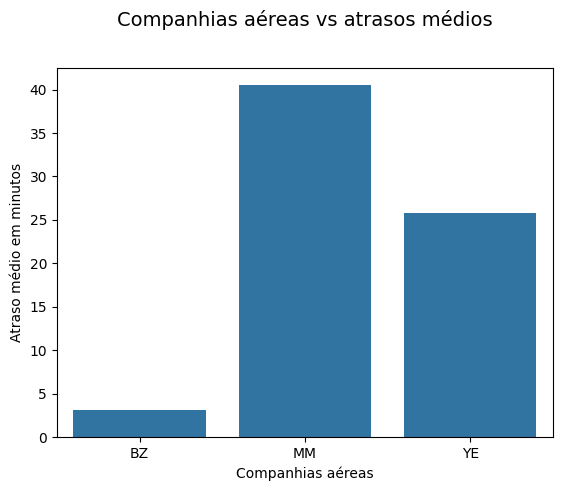

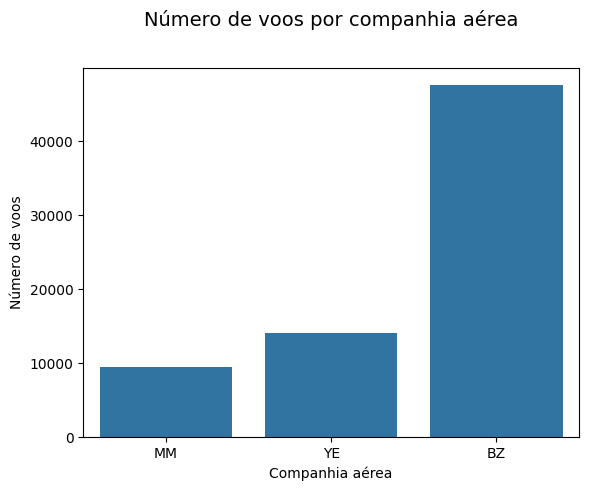

In [202]:
#Criando dois gráficos para saber qual é a média de atraso de vvos entra as Companhias aéreas, e quais são Número de voos qua as companias realizam
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios', fontsize=14, pad= 30)
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='airline')
plt.title('Número de voos por companhia aérea', fontsize=14, pad= 30)
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

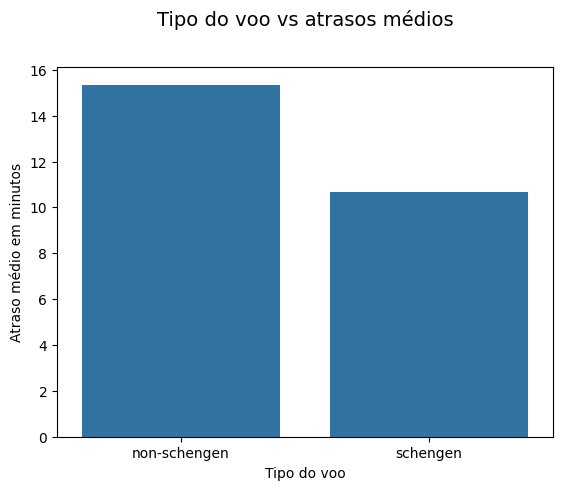

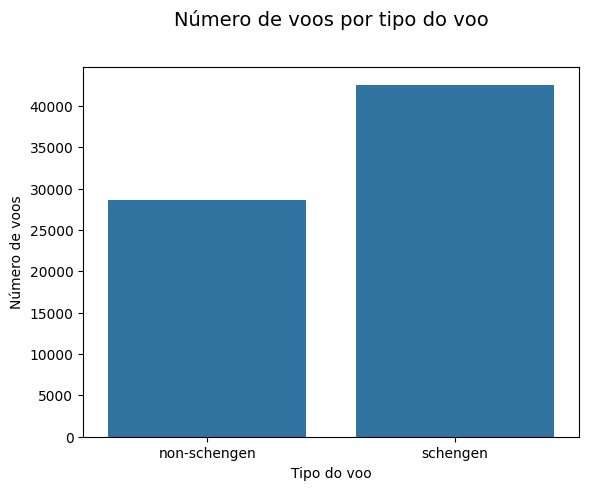

In [203]:
#construir dois gráficos um para os tipos de voo qua atrasam, e outra para quais desses atrasam mais.
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos médios', fontsize=14, pad= 30)
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo', fontsize=14, pad= 30)
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

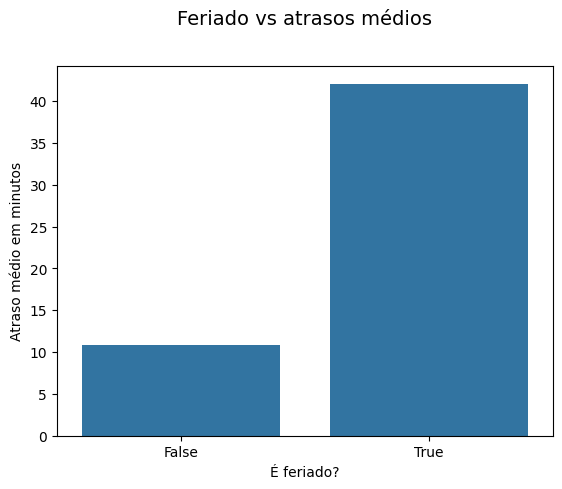

In [204]:
# Esse gráfico vamos observar os atrasos em feriados
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos médios', fontsize=14, pad= 30)
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

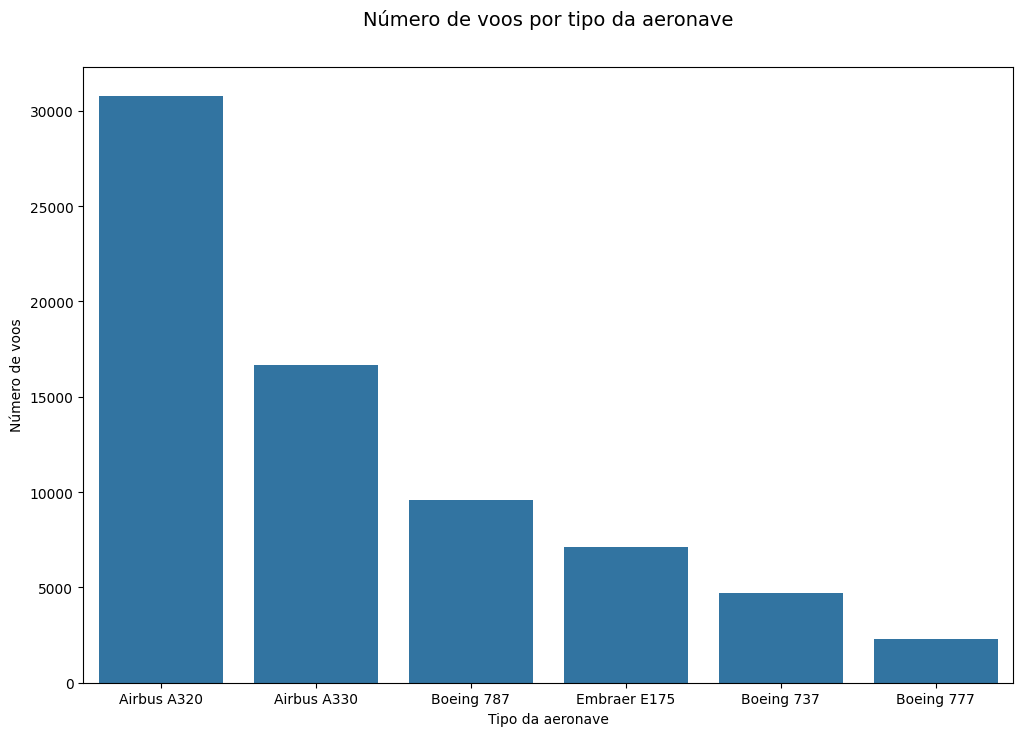

In [205]:
#Gráfico para entender quais aeronaves atrasam mais
order = dados['aircraft_type'].value_counts().index
plt.figure(figsize=(12, 8)) 
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave', fontsize=14, pad=30 )
plt.xticks(rotation=0)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

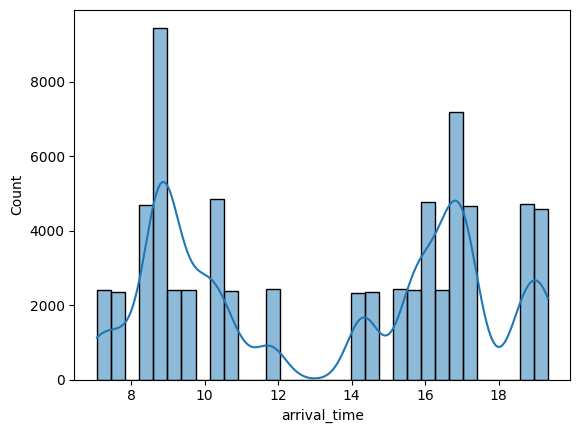

In [206]:
#Criando histogramas para visualizar os horários de CHEGADA onde acontecem mais atrasos
sns.histplot(data=dados, x='arrival_time', kde=True)

<Axes: xlabel='departure_time', ylabel='Count'>

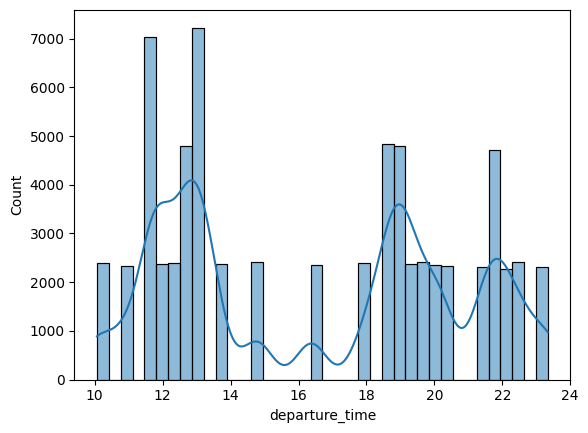

In [207]:
##Criando histogramas para visualizar os horários de SAÍDA onde acontecem mais atrasos
sns.histplot(data=dados, x='departure_time', kde=True)

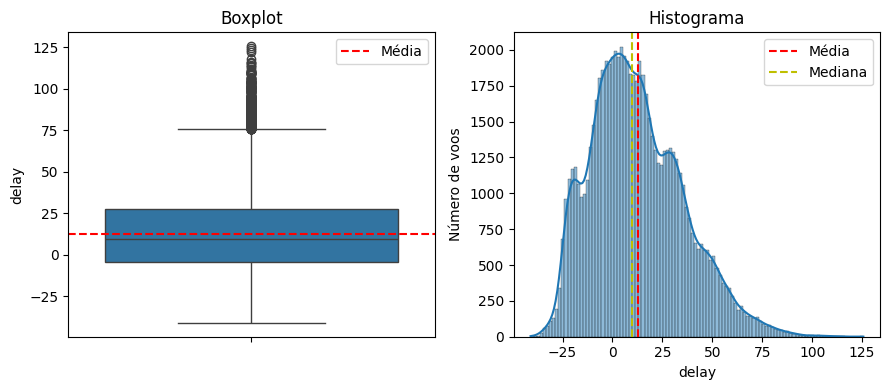

In [208]:
#Criando Boxplot e um histogramas para visualizar a média e a mediana dos atrasos
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

sns.histplot(data=dados, x='delay', ax=axes[1], kde=True)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

Obtendo novas colunas para expandir a análise

In [209]:
#Vizualisação dos dados
dados.head(1)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981


In [210]:
#transformar a coluna year em string
dados['year'].astype(str)

0        2010
1        2010
2        2010
3        2010
4        2010
         ... 
71170    2022
71171    2022
71172    2022
71173    2022
71174    2022
Name: year, Length: 71175, dtype: object

In [211]:
#transformar a coluna day em string, mas com Pandas não consegue interpretar o zero como sendo o dia acressento o +1 ao código.
(dados['day'] + 1).astype(str)

0          1
1          1
2          1
3          1
4          1
        ... 
71170    365
71171    365
71172    365
71173    365
71174    365
Name: day, Length: 71175, dtype: object

In [212]:
#Agora vamos criar uma nova coluna e chamaremos de dados 'date'
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day'] + +1 ).astype(str), format='%Y-%j')

dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [213]:
#para saber os fim de semanas: como o zer0 seria para segundas, 5 e 6 irão ser sábado e domingo
dados['is_weekend'] = dados['date'].dt.weekday.isin([5, 6])

In [214]:
#Já para denomear todos os dias da sameana 
dados['day_name'] = dados['date'].dt.day_name()

dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


Trabalhando com variáveis categóricas

In [215]:
#verificar quais são esses valores únicos
dados.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

In [216]:
#Quais são os valores unicos da coluna 'schengen'
dados['schengen'].unique()

array(['non-schengen', 'schengen'], dtype=object)

In [217]:
dados['is_weekend'].unique()

array([False,  True])

In [218]:
dados['is_holiday'].unique()

array([False,  True])

In [219]:
# Estão como non-schengen' e 'schengen' em vez de 0 / true e 1 / false
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})

dados.head()

C:\Users\ingri\AppData\Local\Temp\ipykernel_2444\1770486362.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
C:\Users\ingri\AppData\Local\Temp\ipykernel_2444\1770486362.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
C:\Users\ingri\AppData\Local\Temp\ipykernel_2444\1770486362.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futur

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [220]:
#Ciar uma lista com as variáveis que têm mais de duas categorias 'airline', 'aircraft_type', 'origin' e 'day_name'
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

In [221]:
# Criando um DataFrame e para visualizar apenas dois resultados incluimos .head(2)
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int).head(2)

df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0


Limpeza de dados 

In [222]:
#A análise de correlação nos retorna um índice que varia de -1 a 1, onde -1 indica uma correlação negativa perfeita e significa que se uma variável cresce, a outra decresce na mesma proporção, ou seja, são inversas.
dados[['arrival_time', 'departure_time']]

,arrival_time,departure_time
0,8.885071,10.885071
1,8.939996,11.939996
2,18.635384,22.635384
3,15.967963,17.967963
4,16.571894,19.571894
...,...,...
71170,18.635384,22.635384
71171,16.718722,21.718722
71172,8.564949,13.564949
71173,9.344097,12.344097


In [223]:
# selecionar o conjunto de dados 'arrival_time' e 'departure_time'
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.0,1.0
departure_time,1.0,1.0


In [224]:
# atribuir a um DataFrame as colunas removidas
df_clean = df_encoded.drop(["flight_id", "departure_time", "day", "year", "date"], axis=1)

df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
